In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List

def plotGraph(f, an:List, limit_inf:float, limit_sup:float):
    #f:function
    
    #create 100 equally spaced points between limit_inf and limit_sup
    x = np.linspace(limit_inf, limit_sup, 100)
    #calculate the y value for each element of the x vector
    y:List = []
    for xk in x:
        y.append(f(xk))
        
    plt.plot(x, y)
    
    plt.grid(b=True)
    for xn in an:
        plt.scatter(xn, f(xn), marker="o")

In [2]:
from typing import Tuple

def falsePos(f, a:float, b:float, epsilon:float, n_iter:int) -> List:
    #f:function

    an:List = []
    i:int =-1
        
    xn:float = (a*f(b) - b*f(a))/(f(b)-f(a))
        
    for n in range(n_iter):
        
        an.append(xn)
        i += 1
        
        if(i > 0):
            erro = abs(xn - an[i-1])/abs(xn)
            if(erro <= epsilon):
                print(f"Solução encontrada na {n+1}º iteração.")
                return xn, an, erro
        
        if f(a)*f(xn) < 0.0:
            b = xn
        else:
            a = xn
            
        xn = (a*f(b) - b*f(a))/(f(b)-f(a))
        
    print(f"Fim das iterações. Solução não encontrada.")
    return None, an, None

In [3]:
import math

f = lambda m : math.sqrt(39.24*m)*math.tanh(math.sqrt(39.24/m)) - 36
a:float = 125
b:float = 150
epsilon:float = 1e-8
n_iter:int = 50

Solução encontrada na 8º iteração.
f(x) = 0 para x = 142.73763328833806
(an) = [143.55105552686985, 142.82874120019426, 142.7478377581137, 142.73877609017433, 142.737761129232, 142.73764744754203, 142.73763471451326, 142.73763328833806]
erro = 9.991585049909952e-09


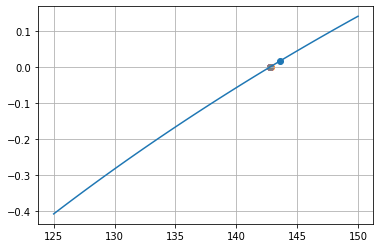

In [5]:
result:List = falsePos(f, a, b, epsilon, n_iter)
print(f"f(x) = 0 para x = {result[0]}")
print(f"(an) = {result[1]}")
print(f"Erro = {result[2]}")
plotGraph(f, result[1], a, b)